In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture 

In [2]:
''' reading dataset '''
df = pd.read_csv("pokemon.csv")

''' displaying first 10 rows of dataset '''
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [3]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
''' taking two rows only '''
df_ = df[['Attack','Defense']]
df_

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43
...,...,...
795,100,150
796,160,110
797,110,60
798,160,60


In [5]:
def do_agglomerative(X, nclust=2):
    m = AgglomerativeClustering(n_clusters=nclust,linkage='ward')
    cluster_labels = m.fit_predict(X)
    return (cluster_labels)

''' calling do_agglomeratve function '''
cluster_labels = do_agglomerative(df_, 20)
agg = pd.DataFrame(cluster_labels,columns=['agglomerative'])
df_.insert((df_.shape[1]), 'agglomerative', agg)

In [6]:
df__ = df_
df__['Name'] = df['Name']
df__

C:\Users\Ahmed Ali\AppData\Local\Temp\ipykernel_18296\4051820132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df__['Name'] = df['Name']


,Attack,Defense,agglomerative,Name
0,49,49,9,Bulbasaur
1,62,63,15,Ivysaur
2,82,83,2,Venusaur
3,100,123,7,VenusaurMega Venusaur
4,52,43,11,Charmander
...,...,...,...,...
795,100,150,7,Diancie
796,160,110,16,DiancieMega Diancie
797,110,60,10,HoopaHoopa Confined
798,160,60,13,HoopaHoopa Unbound


In [7]:
for i in range(20):
    n = df__[df__['agglomerative'] == i]['Name'] 
    print('[ Agglomerative '+str(i)+' ]')
    print(list(set(n)))
    print()

[ Agglomerative 0 ]
['Metapod', 'Spoink', 'Weedle', 'Spewpa', 'Wingull', 'Combee', 'Cottonee', 'Ralts', 'Blissey', 'Solosis', 'Hoothoot', 'Abra', 'Kricketot', 'Luvdisc', 'Happiny', 'Burmy', 'Slugma', 'Pichu', 'Azurill', 'Kakuna', 'Petilil', 'Tentacool', 'Chingling', 'Cherubi', 'Kirlia', 'Gothita', 'Smoochum', 'Tyrogue', 'Voltorb', 'Caterpie', 'Cascoon', 'Litwick', 'Kadabra', 'Smeargle', 'Zigzagoon', 'Mareep', 'Cleffa', 'Munna', 'Magikarp', 'Chinchou', 'Lotad', 'Igglybuff', 'Vulpix', 'Mime Jr.', 'Scatterbug', 'Togepi', 'Ledian', 'Surskit', 'Jigglypuff', 'Hoppip', 'Chansey', 'Wobbuffet', 'Feebas', 'Flabébé', 'Noibat', 'Marill', 'Silcoon', 'Helioptile', 'Wynaut', 'Ledyba', 'Gastly', 'Mantyke', 'Sunkern', 'Budew', 'Bunnelby']

[ Agglomerative 1 ]
['AbomasnowMega Abomasnow', 'Gigalith', 'MetagrossMega Metagross', 'Rhydon', 'Rhyperior', 'Tyranitar', 'CharizardMega Charizard X', 'Tyrantrum', 'Kingler', 'TyranitarMega Tyranitar', 'Escavalier', 'GroudonPrimal Groudon', 'Arceus', 'ScizorMega Sci

In [8]:
df__.groupby('agglomerative').mean()

,Attack,Defense
agglomerative,,
0,28.769231,38.123077
1,136.800000,126.750000
2,77.970149,86.179104
3,128.711111,89.400000
4,100.246154,89.061538
5,105.875000,198.000000
6,82.961538,56.871795
7,96.585366,124.390244
8,98.851064,68.212766


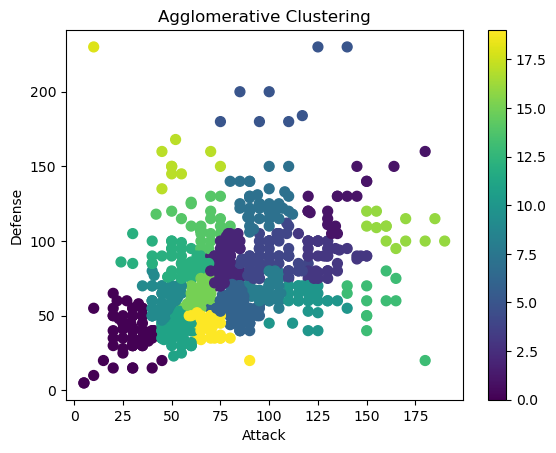

In [9]:
''' plotting scatter plot'''
figure = plt.figure()
ax = figure.add_subplot(111)
sc = ax.scatter(df__['Attack'], df__['Defense'], c=df__['agglomerative'], s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
plt.rcParams['figure.figsize'] = (6,5)
plt.colorbar(sc)

In [10]:
'''Group of attack ability max'''
names = df__[df__['agglomerative']==6]['Name']
print(list(names))

['Beedrill', 'Raticate', 'Arbok', 'Raichu', 'Nidorino', 'Golbat', 'Paras', 'Dugtrio', 'Machop', 'Weepinbell', 'Ponyta', 'Doduo', 'Grimer', 'Electabuzz', 'Magmar', 'Dragonair', 'Furret', 'Aipom', 'Sunflora', 'Murkrow', 'Girafarig', 'Snubbull', 'Sneasel', 'Teddiursa', 'Houndoom', 'Pupitar', 'Sceptile', 'Combusken', 'Marshtomp', 'Swellow', 'GardevoirMega Gardevoir', 'Ninjask', 'Shedinja', 'Manectric', 'Volbeat', 'Wailord', 'Cacnea', 'Corphish', 'Anorith', 'Bagon', 'Monferno', 'Bibarel', 'Kricketune', 'Luxio', 'Mothim', 'Gastrodon', 'Drifblim', 'Purugly', 'Munchlax', 'Porygon-Z', 'Froslass', 'Pignite', 'Dewott', 'Watchog', 'Herdier', 'Liepard', 'Tranquill', 'Drilbur', 'Timburr', 'Krokorok', 'Darumaka', 'Maractus', 'Swanna', 'Emolga', 'Amoonguss', 'Galvantula', 'Eelektrik', 'Axew', 'Mienfoo', 'Pawniard', 'Rufflet', 'Zweilous', 'Larvesta', 'Fletchinder', 'Talonflame', 'Pancham', 'Furfrou', 'Sliggoo']


In [11]:
f = []
for i in set(names):
    f += [i.lower() + '.png']
print(f)
print(len(f))

['bagon.png', 'swanna.png', 'darumaka.png', 'mothim.png', 'liepard.png', 'sceptile.png', 'manectric.png', 'pignite.png', 'volbeat.png', 'anorith.png', 'eelektrik.png', 'electabuzz.png', 'cacnea.png', 'grimer.png', 'herdier.png', 'beedrill.png', 'gardevoirmega gardevoir.png', 'porygon-z.png', 'gastrodon.png', 'purugly.png', 'raticate.png', 'wailord.png', 'ninjask.png', 'drilbur.png', 'axew.png', 'krokorok.png', 'nidorino.png', 'weepinbell.png', 'sneasel.png', 'houndoom.png', 'pupitar.png', 'sunflora.png', 'rufflet.png', 'kricketune.png', 'snubbull.png', 'machop.png', 'furfrou.png', 'drifblim.png', 'paras.png', 'maractus.png', 'murkrow.png', 'magmar.png', 'dewott.png', 'combusken.png', 'galvantula.png', 'fletchinder.png', 'dragonair.png', 'amoonguss.png', 'munchlax.png', 'bibarel.png', 'emolga.png', 'froslass.png', 'raichu.png', 'mienfoo.png', 'shedinja.png', 'aipom.png', 'pawniard.png', 'corphish.png', 'teddiursa.png', 'furret.png', 'monferno.png', 'swellow.png', 'arbok.png', 'watchog.p

In [12]:
''' directory path '''
img_path =r'C:\Users\Ahmed Ali\OneDrive\Desktop\data science notes\DL projects\Pokemon Generation Clustering\images\images'

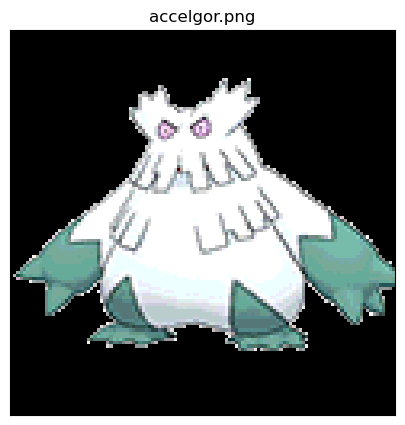

In [26]:
''' plotting 1st image '''
files = os.listdir(img_path)

# Select the index of the second image (index 1, since indexing starts at 0)
i = 0

# Read the image using cv2
img = cv2.imread(os.path.join(img_path, files[i]))

# Check if image is loaded properly
if img is not None:
    # Convert image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create a Matplotlib figure and axis
    f, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    # Display the image using Matplotlib
    ax.imshow(img_rgb)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(files[j])
    
    plt.show()
else:
    print(f"Failed to load image: {files[j]}")

In [14]:
''' Group of attack ability min '''
names2 = df__[df__['agglomerative'] == 17]['Name']
print(list(names2))

['Onix', 'Nosepass', 'Registeel', 'DeoxysDefense Forme', 'Bastiodon', 'Probopass', 'Cofagrigus', 'AegislashShield Forme', 'Carbink']


In [15]:
f2=[]
for i in set(names2):
    f2 += [i.lower() + '.png']
    
print(f2)
print(len(f2))

['carbink.png', 'nosepass.png', 'cofagrigus.png', 'aegislashshield forme.png', 'probopass.png', 'registeel.png', 'onix.png', 'deoxysdefense forme.png', 'bastiodon.png']
9


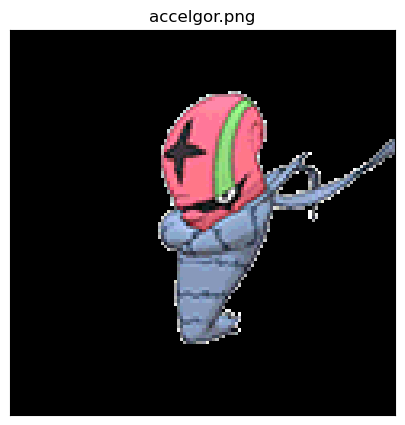

In [16]:
''' plotting 2nd image '''

# List all files in img_path
files = os.listdir(img_path)

# Select the index of the second image (index 1, since indexing starts at 0)
j = 1

# Read the image using cv2
img = cv2.imread(os.path.join(img_path, files[j]))

# Check if image is loaded properly
if img is not None:
    # Convert image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create a Matplotlib figure and axis
    f, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    # Display the image using Matplotlib
    ax.imshow(img_rgb)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(files[j])
    
    plt.show()
else:
    print(f"Failed to load image: {files[j]}")
